# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Open weather url api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#Need Try except loop and loop for each city in cities
url = "http://api.openweathermap.org/data/2.5/weather?q="
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
found_city = []
found_lats = []
found_longs = []
for i, each_city in enumerate(cities):
    display(f"Processing Record {i} of Set 1 | {each_city}")
    city_json = requests.get(f'{url}{each_city}&appid={weather_api_key}').json()
    
    try:
        max_temp.append(city_json["main"]["temp_max"])
        humidity.append(city_json["main"]["humidity"])
        cloudiness.append(city_json["clouds"]["all"])
        wind_speed.append(city_json["wind"]["speed"])
        country.append(city_json["sys"]["country"])
        date.append(city_json["dt"])
        found_city.append(each_city)
        found_lats.append(city_json["coord"]["lat"])
        found_longs.append(city_json["coord"]["lon"])
    except:
        display("City not found. Skipping...")
        pass

'Processing Record 0 of Set 1 | bilibino'

'Processing Record 1 of Set 1 | kapaa'

'Processing Record 2 of Set 1 | klaksvik'

'Processing Record 3 of Set 1 | albany'

'Processing Record 4 of Set 1 | walvis bay'

'Processing Record 5 of Set 1 | nguiu'

'City not found. Skipping...'

'Processing Record 6 of Set 1 | rikitea'

'Processing Record 7 of Set 1 | ushuaia'

'Processing Record 8 of Set 1 | pevek'

'Processing Record 9 of Set 1 | tiksi'

'Processing Record 10 of Set 1 | nabire'

'Processing Record 11 of Set 1 | port alfred'

'Processing Record 12 of Set 1 | nador'

'Processing Record 13 of Set 1 | dunedin'

'Processing Record 14 of Set 1 | belushya guba'

'City not found. Skipping...'

'Processing Record 15 of Set 1 | gushikawa'

'Processing Record 16 of Set 1 | chimbote'

'Processing Record 17 of Set 1 | butaritari'

'Processing Record 18 of Set 1 | isla mujeres'

'Processing Record 19 of Set 1 | mar del plata'

'Processing Record 20 of Set 1 | dolbeau'

'City not found. Skipping...'

'Processing Record 21 of Set 1 | jamestown'

'Processing Record 22 of Set 1 | puerto ayora'

'Processing Record 23 of Set 1 | hobart'

'Processing Record 24 of Set 1 | busselton'

'Processing Record 25 of Set 1 | fortuna'

'Processing Record 26 of Set 1 | pisco'

'Processing Record 27 of Set 1 | barrow'

'Processing Record 28 of Set 1 | samusu'

'City not found. Skipping...'

'Processing Record 29 of Set 1 | bluff'

'Processing Record 30 of Set 1 | mataura'

'Processing Record 31 of Set 1 | mount isa'

'Processing Record 32 of Set 1 | hami'

'Processing Record 33 of Set 1 | sisimiut'

'Processing Record 34 of Set 1 | juneau'

'Processing Record 35 of Set 1 | agua dulce'

'Processing Record 36 of Set 1 | punta arenas'

'Processing Record 37 of Set 1 | iqaluit'

'Processing Record 38 of Set 1 | carnarvon'

'Processing Record 39 of Set 1 | port elizabeth'

'Processing Record 40 of Set 1 | chuy'

'Processing Record 41 of Set 1 | lagoa'

'Processing Record 42 of Set 1 | georgetown'

'Processing Record 43 of Set 1 | mae hong son'

'Processing Record 44 of Set 1 | moree'

'Processing Record 45 of Set 1 | nikolskoye'

'Processing Record 46 of Set 1 | victoria'

'Processing Record 47 of Set 1 | vaini'

'Processing Record 48 of Set 1 | bambous virieux'

'Processing Record 49 of Set 1 | atuona'

'Processing Record 50 of Set 1 | chokurdakh'

'Processing Record 51 of Set 1 | killybegs'

'Processing Record 52 of Set 1 | cangzhou'

'Processing Record 53 of Set 1 | sao joao da barra'

'Processing Record 54 of Set 1 | bredasdorp'

'Processing Record 55 of Set 1 | asau'

'Processing Record 56 of Set 1 | tumannyy'

'City not found. Skipping...'

'Processing Record 57 of Set 1 | kavaratti'

'Processing Record 58 of Set 1 | lima'

'Processing Record 59 of Set 1 | nhulunbuy'

'Processing Record 60 of Set 1 | nanchang'

'Processing Record 61 of Set 1 | namibe'

'Processing Record 62 of Set 1 | ugoofaaru'

'Processing Record 63 of Set 1 | timbiqui'

'Processing Record 64 of Set 1 | illoqqortoormiut'

'City not found. Skipping...'

'Processing Record 65 of Set 1 | castro'

'Processing Record 66 of Set 1 | lebu'

'Processing Record 67 of Set 1 | khash'

'Processing Record 68 of Set 1 | marivan'

'Processing Record 69 of Set 1 | evensk'

'Processing Record 70 of Set 1 | tabou'

'Processing Record 71 of Set 1 | hermanus'

'Processing Record 72 of Set 1 | atar'

'Processing Record 73 of Set 1 | new norfolk'

'Processing Record 74 of Set 1 | attawapiskat'

'City not found. Skipping...'

'Processing Record 75 of Set 1 | teguldet'

'Processing Record 76 of Set 1 | saint-philippe'

'Processing Record 77 of Set 1 | sentyabrskiy'

'City not found. Skipping...'

'Processing Record 78 of Set 1 | hovd'

'Processing Record 79 of Set 1 | tasiilaq'

'Processing Record 80 of Set 1 | ponta do sol'

'Processing Record 81 of Set 1 | laguna'

'Processing Record 82 of Set 1 | la ronge'

'Processing Record 83 of Set 1 | yellowknife'

'Processing Record 84 of Set 1 | hofn'

'Processing Record 85 of Set 1 | kaitangata'

'Processing Record 86 of Set 1 | hanover'

'Processing Record 87 of Set 1 | sibolga'

'Processing Record 88 of Set 1 | zhigansk'

'Processing Record 89 of Set 1 | kloulklubed'

'Processing Record 90 of Set 1 | qaanaaq'

'Processing Record 91 of Set 1 | los llanos de aridane'

'Processing Record 92 of Set 1 | dikson'

'Processing Record 93 of Set 1 | taolanaro'

'City not found. Skipping...'

'Processing Record 94 of Set 1 | korla'

'Processing Record 95 of Set 1 | tuatapere'

'Processing Record 96 of Set 1 | grindavik'

'Processing Record 97 of Set 1 | muriwai beach'

'Processing Record 98 of Set 1 | codrington'

'Processing Record 99 of Set 1 | dalvik'

'Processing Record 100 of Set 1 | mogadishu'

'Processing Record 101 of Set 1 | ust-tsilma'

'Processing Record 102 of Set 1 | upernavik'

'Processing Record 103 of Set 1 | general roca'

'Processing Record 104 of Set 1 | airai'

'Processing Record 105 of Set 1 | carutapera'

'Processing Record 106 of Set 1 | vardo'

'Processing Record 107 of Set 1 | itoman'

'Processing Record 108 of Set 1 | nanortalik'

'Processing Record 109 of Set 1 | cherskiy'

'Processing Record 110 of Set 1 | faanui'

'Processing Record 111 of Set 1 | viedma'

'Processing Record 112 of Set 1 | lieksa'

'Processing Record 113 of Set 1 | kavieng'

'Processing Record 114 of Set 1 | leningradskiy'

'Processing Record 115 of Set 1 | torbay'

'Processing Record 116 of Set 1 | jumla'

'Processing Record 117 of Set 1 | inderborskiy'

'City not found. Skipping...'

'Processing Record 118 of Set 1 | angoche'

'Processing Record 119 of Set 1 | aporawan'

'City not found. Skipping...'

'Processing Record 120 of Set 1 | provideniya'

'Processing Record 121 of Set 1 | nome'

'Processing Record 122 of Set 1 | tignere'

'Processing Record 123 of Set 1 | satitoa'

'City not found. Skipping...'

'Processing Record 124 of Set 1 | outjo'

'Processing Record 125 of Set 1 | saskylakh'

'Processing Record 126 of Set 1 | patos de minas'

'Processing Record 127 of Set 1 | kachug'

'Processing Record 128 of Set 1 | port-gentil'

'Processing Record 129 of Set 1 | szczecinek'

'Processing Record 130 of Set 1 | college'

'Processing Record 131 of Set 1 | altay'

'Processing Record 132 of Set 1 | teya'

'Processing Record 133 of Set 1 | bure'

'Processing Record 134 of Set 1 | pokhara'

'Processing Record 135 of Set 1 | vaitupu'

'City not found. Skipping...'

'Processing Record 136 of Set 1 | mrirt'

'City not found. Skipping...'

'Processing Record 137 of Set 1 | anadyr'

'Processing Record 138 of Set 1 | broome'

'Processing Record 139 of Set 1 | baturaja'

'Processing Record 140 of Set 1 | thompson'

'Processing Record 141 of Set 1 | kudahuvadhoo'

'Processing Record 142 of Set 1 | yongchang'

'Processing Record 143 of Set 1 | hirara'

'Processing Record 144 of Set 1 | ilulissat'

'Processing Record 145 of Set 1 | richards bay'

'Processing Record 146 of Set 1 | cape town'

'Processing Record 147 of Set 1 | souillac'

'Processing Record 148 of Set 1 | esperance'

'Processing Record 149 of Set 1 | pangnirtung'

'Processing Record 150 of Set 1 | jiuquan'

'Processing Record 151 of Set 1 | totness'

'Processing Record 152 of Set 1 | talakan'

'Processing Record 153 of Set 1 | yerbogachen'

'Processing Record 154 of Set 1 | avarua'

'Processing Record 155 of Set 1 | kabare'

'Processing Record 156 of Set 1 | nishihara'

'Processing Record 157 of Set 1 | quatre cocos'

'Processing Record 158 of Set 1 | paamiut'

'Processing Record 159 of Set 1 | el higo'

'Processing Record 160 of Set 1 | kaeo'

'Processing Record 161 of Set 1 | sorbhog'

'Processing Record 162 of Set 1 | borama'

'City not found. Skipping...'

'Processing Record 163 of Set 1 | kurchum'

'Processing Record 164 of Set 1 | luderitz'

'Processing Record 165 of Set 1 | camacha'

'Processing Record 166 of Set 1 | keflavik'

'Processing Record 167 of Set 1 | dicabisagan'

'Processing Record 168 of Set 1 | newton'

'Processing Record 169 of Set 1 | novovarshavka'

'Processing Record 170 of Set 1 | ribeira grande'

'Processing Record 171 of Set 1 | monterey'

'Processing Record 172 of Set 1 | rio cuarto'

'Processing Record 173 of Set 1 | lata'

'Processing Record 174 of Set 1 | alofi'

'Processing Record 175 of Set 1 | saleaula'

'City not found. Skipping...'

'Processing Record 176 of Set 1 | puerto escondido'

'Processing Record 177 of Set 1 | cabo rojo'

'Processing Record 178 of Set 1 | orchard homes'

'Processing Record 179 of Set 1 | chilca'

'Processing Record 180 of Set 1 | batie'

'Processing Record 181 of Set 1 | barentsburg'

'City not found. Skipping...'

'Processing Record 182 of Set 1 | prince rupert'

'Processing Record 183 of Set 1 | esmeraldas'

'Processing Record 184 of Set 1 | san patricio'

'Processing Record 185 of Set 1 | tessalit'

'Processing Record 186 of Set 1 | labuhan'

'Processing Record 187 of Set 1 | nassau'

'Processing Record 188 of Set 1 | hambantota'

'Processing Record 189 of Set 1 | sorong'

'Processing Record 190 of Set 1 | kodiak'

'Processing Record 191 of Set 1 | volax'

'Processing Record 192 of Set 1 | amderma'

'City not found. Skipping...'

'Processing Record 193 of Set 1 | trairi'

'Processing Record 194 of Set 1 | saldanha'

'Processing Record 195 of Set 1 | tucurui'

'Processing Record 196 of Set 1 | kalomo'

'City not found. Skipping...'

'Processing Record 197 of Set 1 | san marcos'

'Processing Record 198 of Set 1 | oga'

'Processing Record 199 of Set 1 | tura'

'Processing Record 200 of Set 1 | ngorongoro'

'Processing Record 201 of Set 1 | meulaboh'

'Processing Record 202 of Set 1 | summerville'

'Processing Record 203 of Set 1 | praxedis guerrero'

'Processing Record 204 of Set 1 | la baule-escoublac'

'Processing Record 205 of Set 1 | ahipara'

'Processing Record 206 of Set 1 | khatanga'

'Processing Record 207 of Set 1 | doctor pedro p. pena'

'City not found. Skipping...'

'Processing Record 208 of Set 1 | fairbanks'

'Processing Record 209 of Set 1 | dawei'

'Processing Record 210 of Set 1 | camopi'

'Processing Record 211 of Set 1 | pucallpa'

'Processing Record 212 of Set 1 | tuktoyaktuk'

'Processing Record 213 of Set 1 | east london'

'Processing Record 214 of Set 1 | caravelas'

'Processing Record 215 of Set 1 | jawor'

'Processing Record 216 of Set 1 | te anau'

'Processing Record 217 of Set 1 | outlook'

'Processing Record 218 of Set 1 | burns lake'

'Processing Record 219 of Set 1 | arlit'

'Processing Record 220 of Set 1 | riyadh'

'Processing Record 221 of Set 1 | sao jose da coroa grande'

'Processing Record 222 of Set 1 | hasaki'

'Processing Record 223 of Set 1 | necochea'

'Processing Record 224 of Set 1 | kozlovka'

'Processing Record 225 of Set 1 | berlevag'

'Processing Record 226 of Set 1 | artemisa'

'Processing Record 227 of Set 1 | smoky lake'

'Processing Record 228 of Set 1 | chitapur'

'Processing Record 229 of Set 1 | komsomolskiy'

'Processing Record 230 of Set 1 | hamilton'

'Processing Record 231 of Set 1 | hedaru'

'Processing Record 232 of Set 1 | taltal'

'Processing Record 233 of Set 1 | maceio'

'Processing Record 234 of Set 1 | koroni'

'Processing Record 235 of Set 1 | san andres'

'Processing Record 236 of Set 1 | kalmunai'

'Processing Record 237 of Set 1 | champerico'

'Processing Record 238 of Set 1 | manado'

'Processing Record 239 of Set 1 | sola'

'Processing Record 240 of Set 1 | lumeje'

'Processing Record 241 of Set 1 | duz'

'City not found. Skipping...'

'Processing Record 242 of Set 1 | mahebourg'

'Processing Record 243 of Set 1 | dengzhou'

'Processing Record 244 of Set 1 | tasbuget'

'City not found. Skipping...'

'Processing Record 245 of Set 1 | sinnamary'

'Processing Record 246 of Set 1 | kruisfontein'

'Processing Record 247 of Set 1 | aykhal'

'Processing Record 248 of Set 1 | geraldton'

'Processing Record 249 of Set 1 | arraial do cabo'

'Processing Record 250 of Set 1 | pizarro'

'Processing Record 251 of Set 1 | yialos'

'City not found. Skipping...'

'Processing Record 252 of Set 1 | burica'

'City not found. Skipping...'

'Processing Record 253 of Set 1 | belomorsk'

'Processing Record 254 of Set 1 | usinsk'

'Processing Record 255 of Set 1 | miami'

'Processing Record 256 of Set 1 | santiago'

'Processing Record 257 of Set 1 | homer'

'Processing Record 258 of Set 1 | aden'

'Processing Record 259 of Set 1 | auki'

'Processing Record 260 of Set 1 | fuzhou'

'Processing Record 261 of Set 1 | ballina'

'Processing Record 262 of Set 1 | bathsheba'

'Processing Record 263 of Set 1 | palmer'

'Processing Record 264 of Set 1 | severo-kurilsk'

'Processing Record 265 of Set 1 | muscat'

'Processing Record 266 of Set 1 | winchester'

'Processing Record 267 of Set 1 | limbang'

'Processing Record 268 of Set 1 | miri'

'Processing Record 269 of Set 1 | kharp'

'Processing Record 270 of Set 1 | half moon bay'

'Processing Record 271 of Set 1 | tautira'

'Processing Record 272 of Set 1 | nizhniy tsasuchey'

'Processing Record 273 of Set 1 | langsa'

'Processing Record 274 of Set 1 | rodino'

'Processing Record 275 of Set 1 | rio grande'

'Processing Record 276 of Set 1 | egvekinot'

'Processing Record 277 of Set 1 | ambilobe'

'Processing Record 278 of Set 1 | rafaela'

'Processing Record 279 of Set 1 | huarmey'

'Processing Record 280 of Set 1 | dromolaxia'

'Processing Record 281 of Set 1 | nouadhibou'

'Processing Record 282 of Set 1 | mount gambier'

'Processing Record 283 of Set 1 | ukwa'

'Processing Record 284 of Set 1 | panixtlahuaca'

'City not found. Skipping...'

'Processing Record 285 of Set 1 | deputatskiy'

'Processing Record 286 of Set 1 | natchitoches'

'Processing Record 287 of Set 1 | unye'

'City not found. Skipping...'

'Processing Record 288 of Set 1 | xapuri'

'Processing Record 289 of Set 1 | poros'

'Processing Record 290 of Set 1 | bengkulu'

'Processing Record 291 of Set 1 | muslyumovo'

'Processing Record 292 of Set 1 | srednekolymsk'

'Processing Record 293 of Set 1 | batagay-alyta'

'Processing Record 294 of Set 1 | aripuana'

'Processing Record 295 of Set 1 | bonavista'

'Processing Record 296 of Set 1 | cabo san lucas'

'Processing Record 297 of Set 1 | san quintin'

'Processing Record 298 of Set 1 | cap malheureux'

'Processing Record 299 of Set 1 | udachnyy'

'Processing Record 300 of Set 1 | east wenatchee'

'Processing Record 301 of Set 1 | rocha'

'Processing Record 302 of Set 1 | guayaramerin'

'Processing Record 303 of Set 1 | chifeng'

'Processing Record 304 of Set 1 | eureka'

'Processing Record 305 of Set 1 | taoudenni'

'Processing Record 306 of Set 1 | haliyal'

'Processing Record 307 of Set 1 | freeport'

'Processing Record 308 of Set 1 | san pedro'

'Processing Record 309 of Set 1 | tanete'

'Processing Record 310 of Set 1 | aklavik'

'Processing Record 311 of Set 1 | karratha'

'Processing Record 312 of Set 1 | khorinsk'

'Processing Record 313 of Set 1 | nambucca heads'

'Processing Record 314 of Set 1 | dingle'

'Processing Record 315 of Set 1 | kysyl-syr'

'Processing Record 316 of Set 1 | george town'

'Processing Record 317 of Set 1 | solsvik'

'City not found. Skipping...'

'Processing Record 318 of Set 1 | umm lajj'

'Processing Record 319 of Set 1 | kwinana'

'Processing Record 320 of Set 1 | araouane'

'Processing Record 321 of Set 1 | tabory'

'Processing Record 322 of Set 1 | palmas'

'Processing Record 323 of Set 1 | kieta'

'Processing Record 324 of Set 1 | imbituba'

'Processing Record 325 of Set 1 | phan thiet'

'Processing Record 326 of Set 1 | saryshagan'

'City not found. Skipping...'

'Processing Record 327 of Set 1 | umm kaddadah'

'Processing Record 328 of Set 1 | kyra'

'Processing Record 329 of Set 1 | kongolo'

'Processing Record 330 of Set 1 | beyneu'

'Processing Record 331 of Set 1 | porto murtinho'

'Processing Record 332 of Set 1 | wanaka'

'Processing Record 333 of Set 1 | guerrero negro'

'Processing Record 334 of Set 1 | qax'

'Processing Record 335 of Set 1 | pacific grove'

'Processing Record 336 of Set 1 | lavrentiya'

'Processing Record 337 of Set 1 | bumba'

'Processing Record 338 of Set 1 | shiyan'

'Processing Record 339 of Set 1 | jinka'

'Processing Record 340 of Set 1 | hithadhoo'

'Processing Record 341 of Set 1 | durres'

'Processing Record 342 of Set 1 | marinette'

'Processing Record 343 of Set 1 | miles city'

'Processing Record 344 of Set 1 | keetmanshoop'

'Processing Record 345 of Set 1 | smithers'

'Processing Record 346 of Set 1 | aitape'

'Processing Record 347 of Set 1 | hilo'

'Processing Record 348 of Set 1 | valdivia'

'Processing Record 349 of Set 1 | mindelo'

'Processing Record 350 of Set 1 | olafsvik'

'Processing Record 351 of Set 1 | bulgan'

'Processing Record 352 of Set 1 | sept-iles'

'Processing Record 353 of Set 1 | bethel'

'Processing Record 354 of Set 1 | warqla'

'City not found. Skipping...'

'Processing Record 355 of Set 1 | mazamari'

'Processing Record 356 of Set 1 | goderich'

'Processing Record 357 of Set 1 | srivardhan'

'Processing Record 358 of Set 1 | north branch'

'Processing Record 359 of Set 1 | neiafu'

'Processing Record 360 of Set 1 | mayumba'

'Processing Record 361 of Set 1 | sorvag'

'City not found. Skipping...'

'Processing Record 362 of Set 1 | shitanjing'

'Processing Record 363 of Set 1 | pottsville'

'Processing Record 364 of Set 1 | gamba'

'Processing Record 365 of Set 1 | jujuy'

'City not found. Skipping...'

'Processing Record 366 of Set 1 | asasa'

'Processing Record 367 of Set 1 | skiros'

'City not found. Skipping...'

'Processing Record 368 of Set 1 | deloraine'

'Processing Record 369 of Set 1 | manta'

'Processing Record 370 of Set 1 | kanigoro'

'Processing Record 371 of Set 1 | peski'

'Processing Record 372 of Set 1 | ostrovnoy'

'Processing Record 373 of Set 1 | saint-augustin'

'Processing Record 374 of Set 1 | hay river'

'Processing Record 375 of Set 1 | gat'

'Processing Record 376 of Set 1 | chengde'

'Processing Record 377 of Set 1 | gizo'

'Processing Record 378 of Set 1 | burdur'

'Processing Record 379 of Set 1 | suzu'

'City not found. Skipping...'

'Processing Record 380 of Set 1 | shimoda'

'Processing Record 381 of Set 1 | xianshuigu'

'Processing Record 382 of Set 1 | adrar'

'Processing Record 383 of Set 1 | solnechnyy'

'Processing Record 384 of Set 1 | alness'

'Processing Record 385 of Set 1 | tucuma'

'Processing Record 386 of Set 1 | batagay'

'Processing Record 387 of Set 1 | xiamen'

'Processing Record 388 of Set 1 | salalah'

'Processing Record 389 of Set 1 | grand river south east'

'City not found. Skipping...'

'Processing Record 390 of Set 1 | tual'

'Processing Record 391 of Set 1 | malwan'

'City not found. Skipping...'

'Processing Record 392 of Set 1 | vengerovo'

'Processing Record 393 of Set 1 | ferrol'

'Processing Record 394 of Set 1 | samarai'

'Processing Record 395 of Set 1 | luena'

'Processing Record 396 of Set 1 | ambulu'

'Processing Record 397 of Set 1 | sistranda'

'Processing Record 398 of Set 1 | berezovyy'

'Processing Record 399 of Set 1 | katsuura'

'Processing Record 400 of Set 1 | vila velha'

'Processing Record 401 of Set 1 | saint george'

'Processing Record 402 of Set 1 | presidencia roque saenz pena'

'Processing Record 403 of Set 1 | lasa'

'Processing Record 404 of Set 1 | hastings'

'Processing Record 405 of Set 1 | krizevci'

'Processing Record 406 of Set 1 | rawlins'

'Processing Record 407 of Set 1 | pangoa'

'Processing Record 408 of Set 1 | cassilandia'

'Processing Record 409 of Set 1 | north bend'

'Processing Record 410 of Set 1 | glendive'

'Processing Record 411 of Set 1 | saint-joseph'

'Processing Record 412 of Set 1 | princeton'

'Processing Record 413 of Set 1 | isangel'

'Processing Record 414 of Set 1 | vanimo'

'Processing Record 415 of Set 1 | nuuk'

'Processing Record 416 of Set 1 | constitucion'

'Processing Record 417 of Set 1 | sao filipe'

'Processing Record 418 of Set 1 | waghai'

'Processing Record 419 of Set 1 | flinders'

'Processing Record 420 of Set 1 | rochegda'

'Processing Record 421 of Set 1 | sakaraha'

'Processing Record 422 of Set 1 | de aar'

'Processing Record 423 of Set 1 | keti bandar'

'Processing Record 424 of Set 1 | miranorte'

'City not found. Skipping...'

'Processing Record 425 of Set 1 | louisbourg'

'City not found. Skipping...'

'Processing Record 426 of Set 1 | zvenigovo'

'Processing Record 427 of Set 1 | porto san giorgio'

'Processing Record 428 of Set 1 | jabiru'

'City not found. Skipping...'

'Processing Record 429 of Set 1 | emba'

'Processing Record 430 of Set 1 | cidreira'

'Processing Record 431 of Set 1 | vaitape'

'Processing Record 432 of Set 1 | kutum'

'Processing Record 433 of Set 1 | takehara'

'Processing Record 434 of Set 1 | lazaro cardenas'

'Processing Record 435 of Set 1 | port moresby'

'Processing Record 436 of Set 1 | macheng'

'Processing Record 437 of Set 1 | itapipoca'

'Processing Record 438 of Set 1 | portland'

'Processing Record 439 of Set 1 | norman wells'

'Processing Record 440 of Set 1 | burgos'

'Processing Record 441 of Set 1 | buraydah'

'Processing Record 442 of Set 1 | sidhi'

'Processing Record 443 of Set 1 | urumqi'

'Processing Record 444 of Set 1 | port blair'

'Processing Record 445 of Set 1 | lensk'

'Processing Record 446 of Set 1 | caceres'

'Processing Record 447 of Set 1 | fuenlabrada'

'Processing Record 448 of Set 1 | bandundu'

'Processing Record 449 of Set 1 | honiara'

'Processing Record 450 of Set 1 | puerto colombia'

'Processing Record 451 of Set 1 | bolshiye uki'

'City not found. Skipping...'

'Processing Record 452 of Set 1 | ishikari'

'Processing Record 453 of Set 1 | noyabrsk'

'Processing Record 454 of Set 1 | phonhong'

'Processing Record 455 of Set 1 | ilhabela'

'Processing Record 456 of Set 1 | marcona'

'City not found. Skipping...'

'Processing Record 457 of Set 1 | simplicio mendes'

'Processing Record 458 of Set 1 | kuche'

'City not found. Skipping...'

'Processing Record 459 of Set 1 | bend'

'Processing Record 460 of Set 1 | sangar'

'Processing Record 461 of Set 1 | nanpiao'

'Processing Record 462 of Set 1 | bandarbeyla'

'Processing Record 463 of Set 1 | falealupo'

'City not found. Skipping...'

'Processing Record 464 of Set 1 | lethem'

'Processing Record 465 of Set 1 | dongkan'

'Processing Record 466 of Set 1 | fort myers beach'

'Processing Record 467 of Set 1 | northam'

'Processing Record 468 of Set 1 | mumford'

'Processing Record 469 of Set 1 | ancud'

'Processing Record 470 of Set 1 | hohhot'

'Processing Record 471 of Set 1 | sampit'

'Processing Record 472 of Set 1 | nagapattinam'

'Processing Record 473 of Set 1 | santiago de cuba'

'Processing Record 474 of Set 1 | steinbach'

'Processing Record 475 of Set 1 | kalianget'

'Processing Record 476 of Set 1 | liniere'

'City not found. Skipping...'

'Processing Record 477 of Set 1 | puerto baquerizo moreno'

'Processing Record 478 of Set 1 | gornopravdinsk'

'Processing Record 479 of Set 1 | pangody'

'Processing Record 480 of Set 1 | narsaq'

'Processing Record 481 of Set 1 | coahuayana'

'Processing Record 482 of Set 1 | kayerkan'

'Processing Record 483 of Set 1 | vao'

'Processing Record 484 of Set 1 | tsabong'

'Processing Record 485 of Set 1 | havre-saint-pierre'

'Processing Record 486 of Set 1 | tayoltita'

'Processing Record 487 of Set 1 | tarko-sale'

'Processing Record 488 of Set 1 | vila do maio'

'Processing Record 489 of Set 1 | oussouye'

'Processing Record 490 of Set 1 | alyangula'

'Processing Record 491 of Set 1 | ngunguru'

'Processing Record 492 of Set 1 | foki'

'Processing Record 493 of Set 1 | monte cristi'

'City not found. Skipping...'

'Processing Record 494 of Set 1 | callaguip'

'Processing Record 495 of Set 1 | soc trang'

'Processing Record 496 of Set 1 | sidi ali'

'Processing Record 497 of Set 1 | novo aripuana'

'Processing Record 498 of Set 1 | hualmay'

'Processing Record 499 of Set 1 | omsukchan'

'Processing Record 500 of Set 1 | phan rang'

'City not found. Skipping...'

'Processing Record 501 of Set 1 | avera'

'Processing Record 502 of Set 1 | lagos'

'Processing Record 503 of Set 1 | urcos'

'Processing Record 504 of Set 1 | najran'

'Processing Record 505 of Set 1 | sohna'

'Processing Record 506 of Set 1 | porto alegre'

'Processing Record 507 of Set 1 | bentiu'

'Processing Record 508 of Set 1 | yuscaran'

'Processing Record 509 of Set 1 | zheleznodorozhnyy'

'Processing Record 510 of Set 1 | martil'

'Processing Record 511 of Set 1 | burnie'

'Processing Record 512 of Set 1 | matara'

'Processing Record 513 of Set 1 | nizhneyansk'

'City not found. Skipping...'

'Processing Record 514 of Set 1 | nouakchott'

'Processing Record 515 of Set 1 | barra do garcas'

'Processing Record 516 of Set 1 | tupiza'

'Processing Record 517 of Set 1 | mubende'

'Processing Record 518 of Set 1 | makakilo city'

'Processing Record 519 of Set 1 | formoso do araguaia'

'City not found. Skipping...'

'Processing Record 520 of Set 1 | asayita'

'City not found. Skipping...'

'Processing Record 521 of Set 1 | kupang'

'Processing Record 522 of Set 1 | tuensang'

'Processing Record 523 of Set 1 | georgiyevskoye'

'Processing Record 524 of Set 1 | zvishavane'

'Processing Record 525 of Set 1 | port macquarie'

'Processing Record 526 of Set 1 | muros'

'Processing Record 527 of Set 1 | hounde'

'Processing Record 528 of Set 1 | alta floresta'

'Processing Record 529 of Set 1 | coxim'

'Processing Record 530 of Set 1 | yinchuan'

'Processing Record 531 of Set 1 | sharjah'

'Processing Record 532 of Set 1 | barcelos'

'Processing Record 533 of Set 1 | tomigusuku'

'Processing Record 534 of Set 1 | longyearbyen'

'Processing Record 535 of Set 1 | healesville'

'Processing Record 536 of Set 1 | tortoli'

'Processing Record 537 of Set 1 | fort nelson'

'Processing Record 538 of Set 1 | sokoto'

'Processing Record 539 of Set 1 | morden'

'Processing Record 540 of Set 1 | jalu'

'Processing Record 541 of Set 1 | gravelbourg'

'Processing Record 542 of Set 1 | haines junction'

'Processing Record 543 of Set 1 | domna'

'Processing Record 544 of Set 1 | port shepstone'

'Processing Record 545 of Set 1 | maumere'

'Processing Record 546 of Set 1 | alugan'

'Processing Record 547 of Set 1 | dekar'

'Processing Record 548 of Set 1 | tubuala'

'Processing Record 549 of Set 1 | kontagora'

'Processing Record 550 of Set 1 | caldwell'

'Processing Record 551 of Set 1 | oranjemund'

'Processing Record 552 of Set 1 | yar-sale'

'Processing Record 553 of Set 1 | mukhen'

'Processing Record 554 of Set 1 | vostok'

'Processing Record 555 of Set 1 | port-cartier'

'Processing Record 556 of Set 1 | ustynivka'

'Processing Record 557 of Set 1 | sorland'

'Processing Record 558 of Set 1 | talnakh'

'Processing Record 559 of Set 1 | high level'

'Processing Record 560 of Set 1 | ipixuna'

'Processing Record 561 of Set 1 | herat'

'Processing Record 562 of Set 1 | kununurra'

'Processing Record 563 of Set 1 | kangaatsiaq'

'Processing Record 564 of Set 1 | sayyan'

'Processing Record 565 of Set 1 | elizabeth city'

'Processing Record 566 of Set 1 | oktyabrskoye'

'Processing Record 567 of Set 1 | yumen'

'Processing Record 568 of Set 1 | ontario'

'Processing Record 569 of Set 1 | hihifo'

'City not found. Skipping...'

'Processing Record 570 of Set 1 | saint-pierre'

'Processing Record 571 of Set 1 | yushu'

'Processing Record 572 of Set 1 | southbridge'

'Processing Record 573 of Set 1 | rio gallegos'

'Processing Record 574 of Set 1 | hobyo'

'Processing Record 575 of Set 1 | oron'

'Processing Record 576 of Set 1 | viligili'

'City not found. Skipping...'

'Processing Record 577 of Set 1 | black river'

'Processing Record 578 of Set 1 | gigmoto'

'Processing Record 579 of Set 1 | chagda'

'City not found. Skipping...'

'Processing Record 580 of Set 1 | kundian'

'Processing Record 581 of Set 1 | kabinda'

'Processing Record 582 of Set 1 | ponta delgada'

'Processing Record 583 of Set 1 | coolum beach'

'Processing Record 584 of Set 1 | novoshakhtinsk'

'Processing Record 585 of Set 1 | umea'

'Processing Record 586 of Set 1 | aksarka'

'Processing Record 587 of Set 1 | pitmoaga'

'Processing Record 588 of Set 1 | svetlyy'

'Processing Record 589 of Set 1 | shingu'

'Processing Record 590 of Set 1 | mys shmidta'

'City not found. Skipping...'

'Processing Record 591 of Set 1 | iskateley'

'Processing Record 592 of Set 1 | maromitsa'

'Processing Record 593 of Set 1 | taseyevo'

'Processing Record 594 of Set 1 | cascais'

'Processing Record 595 of Set 1 | tomatlan'

'Processing Record 596 of Set 1 | talen'

'Processing Record 597 of Set 1 | ascension'

'Processing Record 598 of Set 1 | kamskiye polyany'

'Processing Record 599 of Set 1 | port augusta'

'Processing Record 600 of Set 1 | gananoque'

'Processing Record 601 of Set 1 | clarence town'

'Processing Record 602 of Set 1 | paramirim'

'Processing Record 603 of Set 1 | enid'

'Processing Record 604 of Set 1 | pankrushikha'

'Processing Record 605 of Set 1 | vokhma'

'Processing Record 606 of Set 1 | mayo'

'Processing Record 607 of Set 1 | abu samrah'

'Processing Record 608 of Set 1 | antigonish'

'Processing Record 609 of Set 1 | kungurtug'

'Processing Record 610 of Set 1 | at-bashi'

'Processing Record 611 of Set 1 | temaraia'

'City not found. Skipping...'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_df = pd.DataFrame({
    "City" : found_city,
    "Lat" : found_lats,
    "Lng" : found_longs,
    "Max Temp (degrees F)" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date, 
})#(0K − 273.15) × 9/5 + 32
weather_df["Max Temp (degrees F)"] = (weather_df["Max Temp (degrees F)"] - 273.15) *9/5 +32 
weather_df.to_csv("../output_data/cities.csv")
display(weather_df)

,City,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-28.012,79,1,2.38,RU,1612045050
1,kapaa,22.0752,-159.3190,78.800,65,75,7.20,US,1612045050
2,klaksvik,62.2266,-6.5890,33.800,80,75,7.20,FO,1612045050
3,albany,42.6001,-73.9662,19.004,54,13,1.79,US,1612045050
4,walvis bay,-22.9575,14.5053,66.992,82,0,2.06,NA,1612045050
...,...,...,...,...,...,...,...,...,...
554,mayo,38.8876,-76.5119,35.996,48,1,3.60,US,1612045139
555,abu samrah,35.3029,37.1841,49.712,67,98,5.88,SY,1612045140
556,antigonish,45.6169,-61.9986,24.998,79,100,1.79,CA,1612045005
557,kungurtug,50.5994,97.5228,-3.424,84,86,1.91,RU,1612045140


In [12]:
weather_dfagg = weather_df.agg(("count","mean", "std", "min","max"))
weather_dfagg = weather_dfagg[["Lat", "Lng", "Max Temp (degrees F)", "Humidity", "Cloudiness", "Wind Speed", "Date"]]
weather_dfagg = weather_dfagg.append(weather_df.quantile([.25,.5,.75]))
weather_dfagg = weather_dfagg.rename(index = {0.25 : "25%", .5 : "50%", 0.75 : " 75%"})
display(weather_dfagg)

,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
min,-54.800000,-179.166700,-52.708000,11.000000,0.000000,0.260000,1.612044e+09
max,78.218600,178.416700,94.694000,100.000000,100.000000,15.950000,1.612045e+09
mean,20.008789,18.039702,48.011370,72.670841,51.930233,3.635259,1.612045e+09
std,33.487580,91.769949,34.368759,19.103915,39.954461,2.651208,7.144502e+01
25%,-8.499500,-62.497650,25.916000,64.000000,2.500000,1.540000,1.612045e+09
50%,24.083300,22.401000,60.998000,77.000000,59.000000,3.090000,1.612045e+09
75%,47.910900,100.335400,75.632000,86.000000,90.000000,4.910000,1.612045e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df.sort_values(by = ["Humidity"], ascending = False)
humid = weather_df["Humidity"] > 100
humid.value_counts()
#All counts False, no humidity over 100

False    559
Name: Humidity, dtype: int64

In [15]:
#  Get the indices of cities that have humidity over 100%.
#humid values all False (less than 100%)

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
display(clean_city_data)

,City,Lat,Lng,Max Temp (degrees F),Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-28.012,79,1,2.38,RU,1612045050
1,kapaa,22.0752,-159.3190,78.800,65,75,7.20,US,1612045050
2,klaksvik,62.2266,-6.5890,33.800,80,75,7.20,FO,1612045050
3,albany,42.6001,-73.9662,19.004,54,13,1.79,US,1612045050
4,walvis bay,-22.9575,14.5053,66.992,82,0,2.06,NA,1612045050
...,...,...,...,...,...,...,...,...,...
554,mayo,38.8876,-76.5119,35.996,48,1,3.60,US,1612045139
555,abu samrah,35.3029,37.1841,49.712,67,98,5.88,SY,1612045140
556,antigonish,45.6169,-61.9986,24.998,79,100,1.79,CA,1612045005
557,kungurtug,50.5994,97.5228,-3.424,84,86,1.91,RU,1612045140


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

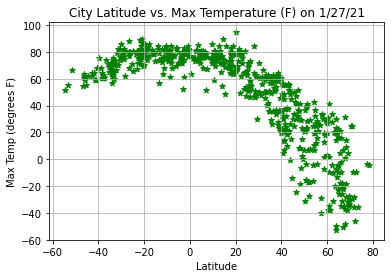

In [19]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Max Temp (degrees F)"],marker = "*", c= "g")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (degrees F)")
plt.title("City Latitude vs. Max Temperature (F) on 1/27/21")
plt.grid(True)
plt.savefig("../output_data/Fig1")
plt.show()

## Latitude vs. Humidity Plot

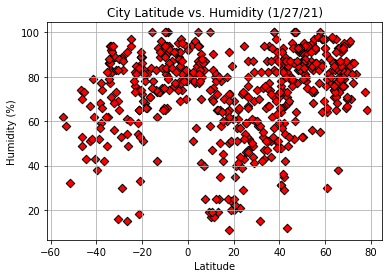

In [21]:
plt.scatter( x= clean_city_data["Lat"], y = clean_city_data["Humidity"],c = "r", marker = "D", edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (1/27/21)")
plt.savefig("../output_data/Fig2")
plt.show()

## Latitude vs. Cloudiness Plot

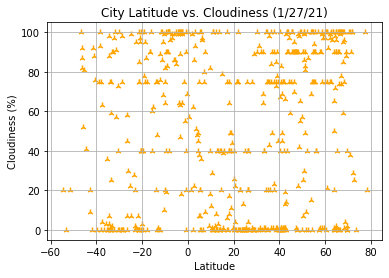

In [23]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Cloudiness"], c = "orange", marker = "2", edgecolors = "black")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (1/27/21)")
plt.savefig("../output_data/Fig3")
plt.show()

## Latitude vs. Wind Speed Plot

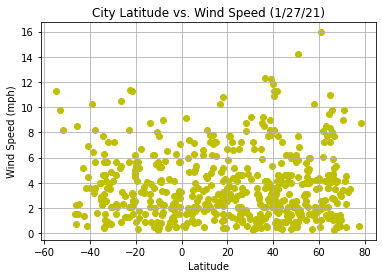

In [25]:
plt.scatter(x = clean_city_data["Lat"], y = clean_city_data["Wind Speed"], c = "y")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (1/27/21)")
plt.savefig("../output_data/Fig4")
plt.show()

## Linear Regression

In [27]:
north_hem = clean_city_data[clean_city_data["Lat"]>=0]
south_hem = clean_city_data[clean_city_data["Lat"]<0]
#linregress with the plots below

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r- value is: -0.8644505089852785


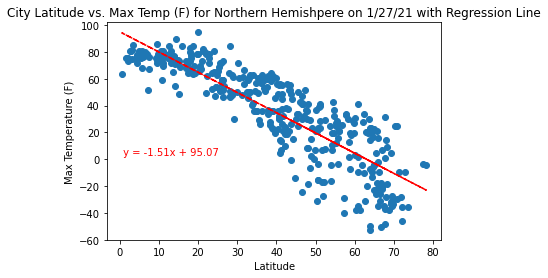

In [29]:
linregress0 = linregress(x = north_hem["Lat"], y = north_hem["Max Temp (degrees F)"])
m0 = round(linregress0[0],2)
b0 = round(linregress0[1],2)
r0 = linregress0[2]
bestfit0 = m0*(north_hem["Lat"]) + b0
print(f'The r- value is: {r0}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Max Temp (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temp (F) for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit0, "--",color = "red")
plt.text(x = 0, y = 3, s = (f' y = {m0}x + {b0}'), c = "red")
plt.savefig("../output_data/Fig5")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r- value is: 0.5508774751430167


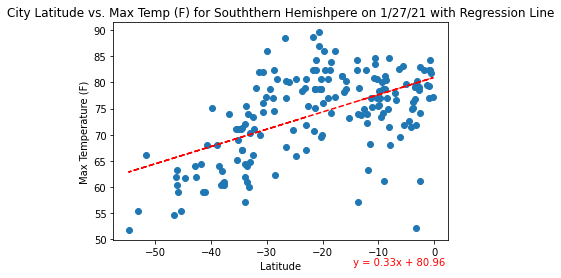

In [31]:
linregress1 = linregress(x = south_hem["Lat"], y = south_hem["Max Temp (degrees F)"])
m1 = round(linregress1[0],2)
b1 = round(linregress1[1],2)
r1 = linregress1[2]
bestfit1 = m1*(south_hem["Lat"]) + b1
print(f'The r- value is: {r1}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Max Temp (degrees F)"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temp (F) for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit1, "--",color = "red")
plt.text(x = -15, y = 45, s = (f' y = {m1}x + {b1}'), c = "red")
plt.savefig("../output_data/Fig6")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.3578422627993299


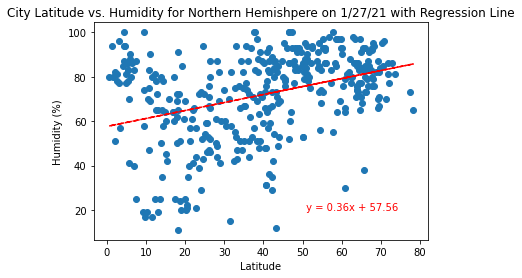

In [33]:
linregress2 = linregress(x = north_hem["Lat"], y = north_hem["Humidity"])
m2 = round(linregress2[0],2)
b2 = round(linregress2[1],2)
r2 = linregress2[2]
bestfit2 = m2*(north_hem["Lat"]) + b2
print(f'The r- value is: {r2}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit2, "--",color = "red")
plt.text(x =50, y = 20, s = (f' y = {m2}x + {b2}'), c = "red")
plt.savefig("../output_data/Fig7")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r- value is: 0.4165204406868472


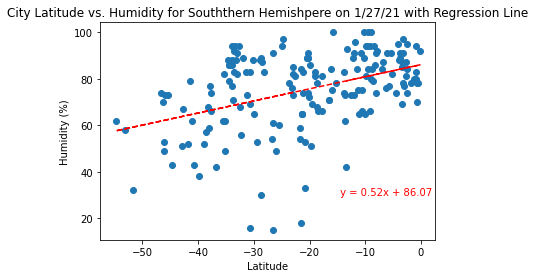

In [35]:
linregress3 = linregress(x = south_hem["Lat"], y = south_hem["Humidity"])
m3 = round(linregress3[0],2)
b3 = round(linregress3[1],2)
r3 = linregress3[2]
bestfit3 = m3*(south_hem["Lat"]) + b3
print(f'The r- value is: {r3}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit3, "--",color = "red")
plt.text(x = -15, y = 30, s = (f' y = {m3}x + {b3}'), c = "red")
plt.savefig("../output_data/Fig8")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r- value is: 0.29237995536612105


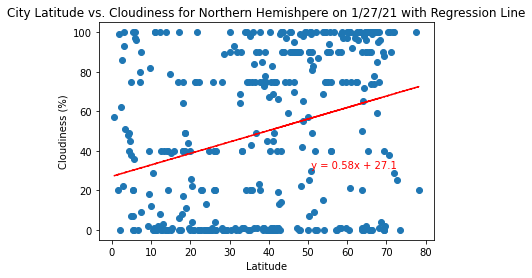

In [37]:
linregress4 = linregress(x = north_hem["Lat"], y = north_hem["Cloudiness"])
m4 = round(linregress4[0],2)
b4 = round(linregress4[1],2)
r4 = linregress4[2]
bestfit4 = m4*(north_hem["Lat"]) + b4
print(f'The r- value is: {r4}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit4, "--",color = "red")
plt.text(x =50, y = 31, s = (f' y = {m4}x + {b4}'), c = "red")
plt.savefig("../output_data/Fig9")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r- value is: 0.33374519311011663


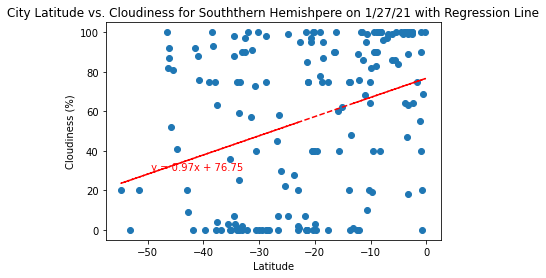

In [39]:
linregress5 = linregress(x = south_hem["Lat"], y = south_hem["Cloudiness"])
m5 = round(linregress5[0],2)
b5 = round(linregress5[1],2)
r5 = linregress5[2]
bestfit5 = m5*(south_hem["Lat"]) + b5
print(f'The r- value is: {r5}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit5, "--",color = "red")
plt.text(x = -50, y = 30, s = (f' y = {m5}x + {b5}'), c = "red")
plt.savefig("../output_data/Fig10")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: 0.0017656184051883803


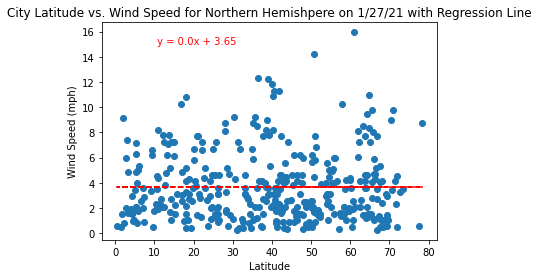

In [41]:
linregress6 = linregress(x = north_hem["Lat"], y = north_hem["Wind Speed"])
m6 = round(linregress6[0],2)
b6 = round(linregress6[1],2)
r6 = linregress6[2]
bestfit6 = m6*(north_hem["Lat"]) + b6
print(f'The r- value is: {r6}')
plt.scatter( x = north_hem["Lat"], y = north_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed for Northern Hemishpere on 1/27/21 with Regression Line")
plt.plot(north_hem["Lat"],bestfit6, "--",color = "red")
plt.text(x =10, y = 15, s = (f' y = {m6}x + {b6}'), c = "red")
plt.savefig("../output_data/Fig11")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r- value is: -0.2018351932047909


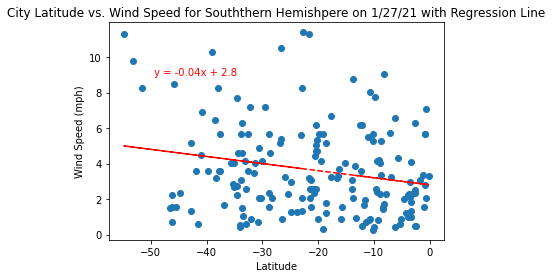

In [45]:
linregress7 = linregress(x = south_hem["Lat"], y = south_hem["Wind Speed"])
m7 = round(linregress7[0],2)
b7 = round(linregress7[1],2)
r7 = linregress7[2]
bestfit7 = m7*(south_hem["Lat"]) + b7
print(f'The r- value is: {r7}')
plt.scatter( x = south_hem["Lat"], y = south_hem["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed for Souththern Hemishpere on 1/27/21 with Regression Line")
plt.plot(south_hem["Lat"],bestfit7, "--",color = "red")
plt.text(x = -50, y = 9, s = (f' y = {m7}x + {b7}'), c = "red")
plt.savefig("../output_data/Fig12")
plt.show()